In [65]:
from PIL import Image, ImageFilter, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

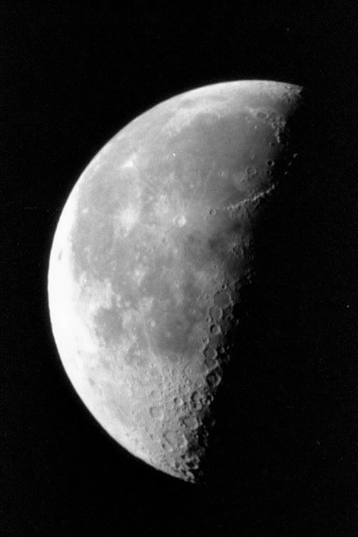

(358, 537)

In [66]:
im = Image.open("moon.tif")
display(im)
im.size

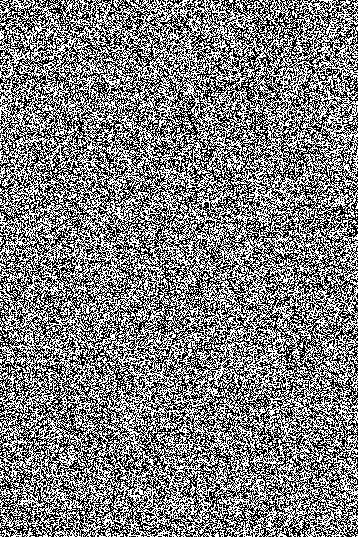

In [88]:
gauss_noise = Image.effect_noise((358, 537), 1000)
gauss_noise.save("gauss_noise.tif")
display(gauss_noise)

In [89]:
im = np.array(Image.open("moon.tif"))
gn = np.array(Image.open("gauss_noise.tif"))

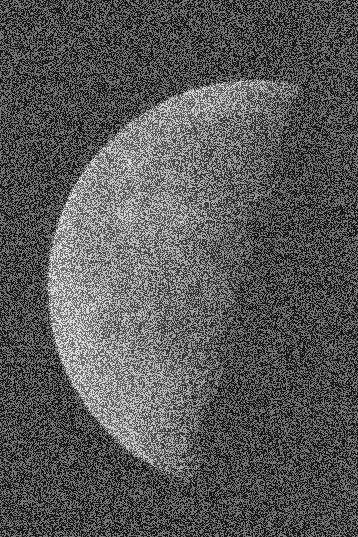

In [90]:
n = im * 0.5 + gn * 0.5
n =n /255
n_img = Image.fromarray(np.uint8(cm.plasma(n)*255))
# applying grayscale method
n_gray = ImageOps.grayscale(n_img)
display(n_gray)

<Figure size 432x288 with 0 Axes>

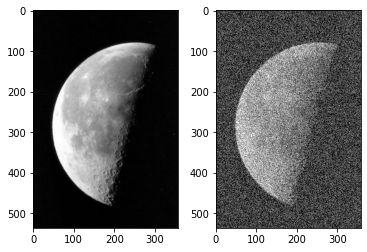

In [91]:
plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(im,'gray')
axarr[1].imshow(n,'gray')

In [117]:
kernel = np.array([[2.0,4.0,2.0], [4.0,8.0,4.0], [2.0,4.0,2.0]])
kernel = kernel / np.sum(kernel)
arraylist = []
for y in range(3):
    temparray = np.copy(n)
    temparray = np.roll(temparray, y - 1, axis=0)
    for x in range(3):
        temparray_X = np.copy(temparray)
        temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
        arraylist.append(temparray_X)

arraylist = np.array(arraylist)
arraylist_sum = np.sum(arraylist, axis=0)

<Figure size 432x288 with 0 Axes>

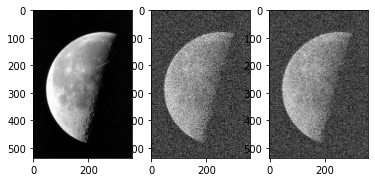

In [118]:
plt.figure()
f, axarr = plt.subplots(1,3)
axarr[0].imshow(im,'gray')
axarr[1].imshow(n,'gray')
axarr[2].imshow(arraylist_sum,'gray')

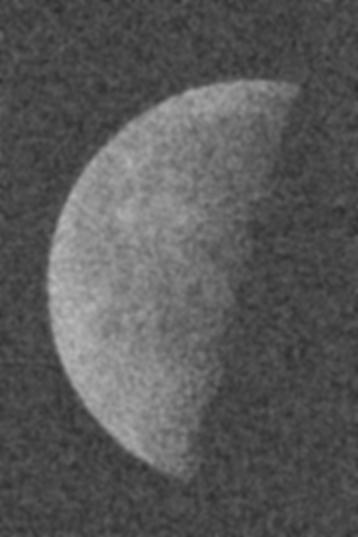

In [116]:
n_gray.filter(ImageFilter.GaussianBlur(radius = 2))

In [130]:
kernel_sobel_X = np.array([[-1.0,0.0,1.0], [-2.0,0.0,2.0], [-1.0,0.0,1.0]])
#kernel_sobel = kernel_sobel / np.sum(kernel_sobel)
arraylist_sobel_X = []
for y in range(3):
    temparray_sobel_X = np.copy(n)
    temparray_sobel_X = np.roll(temparray_sobel_X, y - 1, axis=0)
    for x in range(3):
        temparray_X_sobel_X = np.copy(temparray_sobel_X)
        temparray_X_sobel_X = np.roll(temparray_X_sobel_X, x - 1, axis=1)*kernel_sobel_X[y,x]
        arraylist_sobel_X.append(temparray_X_sobel_X)

arraylist_sobel_X = np.array(arraylist_sobel_X)
arraylist_sum_sobel_X = np.sum(arraylist_sobel_X, axis=0)

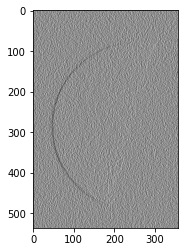

In [131]:
plt.imshow(arraylist_sum_sobel_X,'gray')

In [132]:
kernel_sobel_Y = np.array([[-1.0,-2.0,-1.0], [0.0,0.0,0.0], [1.0,2.0,1.0]])
#kernel_sobel = kernel_sobel / np.sum(kernel_sobel)
arraylist_sobel_Y = []
for y in range(3):
    temparray_sobel_Y = np.copy(n)
    temparray_sobel_Y = np.roll(temparray_sobel_Y, y - 1, axis=0)
    for x in range(3):
        temparray_X_sobel_Y = np.copy(temparray_sobel_Y)
        temparray_X_sobel_Y = np.roll(temparray_X_sobel_Y, x - 1, axis=1)*kernel_sobel_Y[y,x]
        arraylist_sobel_Y.append(temparray_X_sobel_Y)

arraylist_sobel_Y = np.array(arraylist_sobel_Y)
arraylist_sum_sobel_Y = np.sum(arraylist_sobel_Y, axis=0)

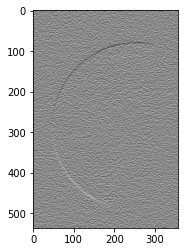

In [133]:
plt.imshow(arraylist_sum_sobel,'gray')

<Figure size 432x288 with 0 Axes>

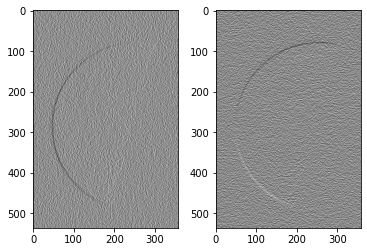

In [137]:
plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(arraylist_sum_sobel_X,'gray')
axarr[1].imshow(arraylist_sum_sobel_Y,'gray')

AttributeError: 'AxesSubplot' object has no attribute 'imhist'

<Figure size 432x288 with 0 Axes>

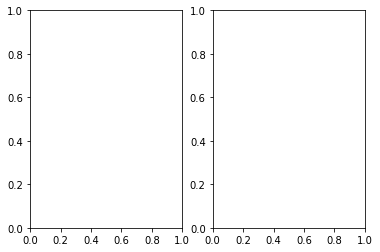

In [138]:
plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imhist(arraylist_sum_sobel_X)
axarr[1].imhist(arraylist_sum_sobel_Y)